In [9]:
import numpy as np
import matplotlib.pyplot as plt
import sounddevice as sd

### Reception du bruit

In [66]:
records = []
for i in range(0, 10):    
    time = 10
    f = 44100
    recording = sd.rec(int(time * f), samplerate=f, channels=1)
    sd.wait()
    print(recording)
    records.append(recording)








[[-0.9640503 ]
 [-1.        ]
 [-0.97579956]
 ...
 [-0.81015015]
 [-0.9926758 ]
 [-1.        ]]
[[-0.94433594]
 [-1.        ]
 [-0.9776306 ]
 ...
 [ 0.9884033 ]
 [ 0.9999695 ]
 [ 0.5984802 ]]
[[ 0.02096558]
 [-0.51086426]
 [-0.9675598 ]
 ...
 [-0.9572449 ]
 [-1.        ]
 [-0.9977722 ]]
[[-0.9377136 ]
 [-1.        ]
 [-0.69018555]
 ...
 [-0.9956665 ]
 [-0.81243896]
 [ 0.30545044]]
[[ 0.9338074]
 [ 0.9999695]
 [ 0.9602661]
 ...
 [-0.8878174]
 [ 0.3375244]
 [ 0.9999695]]
[[ 0.9066467 ]
 [ 0.9999695 ]
 [ 0.35250854]
 ...
 [-1.        ]
 [-1.        ]
 [-0.0796814 ]]
[[ 0.95217896]
 [ 0.9999695 ]
 [ 0.92807007]
 ...
 [-0.9998779 ]
 [-0.4842224 ]
 [ 0.8848572 ]]
[[ 0.9684143 ]
 [ 0.92922974]
 [-0.6596985 ]
 ...
 [-0.508728  ]
 [ 0.74542236]
 [ 0.9999695 ]]
[[ 0.26260376]
 [-0.95562744]
 [-1.        ]
 ...
 [-0.51446533]
 [-1.        ]
 [-0.25619507]]
[[ 0.9999695 ]
 [ 0.6897583 ]
 [-0.8395996 ]
 ...
 [ 0.9999695 ]
 [-0.29089355]
 [-1.        ]]


### Visualisation

Text(0, 0.5, 'Amplitude')

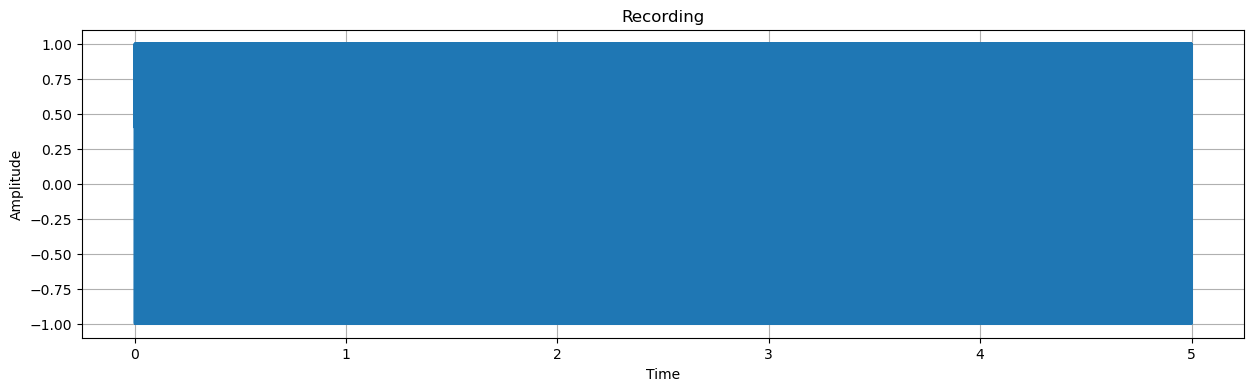

In [64]:
fig, ax = plt.subplots(1, 1, figsize=(15, 4))
t = np.linspace(0, time, int(f * time), endpoint=False)
ax.plot(t,recording)
ax.set_title('Recording')
ax.set_xlabel("Time")
ax.grid(True)
ax.set_ylabel("Amplitude")
#ax.set_xlim(1,1.01060192473242)


In [67]:
for j in range(len(records)):
    x=0
    recording = records[j]
    for i in range(len(recording)-1):
        if recording[i] > 0:
            if recording[i+1] < 0:
                x+=1
        elif recording[i] < 0:
            if recording[i+1] >0:
                x+=1
    x/=2
    Te=1/f
    fi = x/time
    print(fi)
    amplitude = (max(recording)+abs(min(recording)))/2
    #amplitude*=2
    print("L'amplitude max est de :",amplitude)









1183.0
L'amplitude max est de : [0.99998474]
2076.15
L'amplitude max est de : [0.99998474]
3065.1
L'amplitude max est de : [0.99998474]
3991.1
L'amplitude max est de : [0.99998474]
4928.2
L'amplitude max est de : [0.99998474]
5880.75
L'amplitude max est de : [0.99998474]
6841.75
L'amplitude max est de : [0.99998474]
7746.1
L'amplitude max est de : [0.99998474]
9070.45
L'amplitude max est de : [0.99998474]
9952.55
L'amplitude max est de : [0.99998474]
